# Genocide in Gaza: Telling the Story through Data Science!

In [3]:
# Uncomment and Install the below packages, if not yet done.
# ! pip install pdfplumber
# ! pip install arabic_reshaper
# ! pip install python-bidi

In [2]:
# Run this cell to set up the notebook.
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

import warnings
warnings.simplefilter('ignore')

## 1. Preprocessing 

### 1.A Converting the PDF list in the "killed-in-gaza_moh_2024-09-21.pdf" file to CSV.



In [4]:
import pdfplumber
import csv
import arabic_reshaper
from bidi.algorithm import get_display

*Note: Run the below cell only once for the first time, it might take some time to create the CSV file

In [8]:
base_dataset_dir = "datasets/"

In [9]:
def fix_arabic(text):
    if text:
        #v1
        # reshaped_text = arabic_reshaper.reshape(text)
        # return get_display(reshaped_text);
        # v2
        # reshaped_text = get_display(text)
        # arabic_text = arabic_reshaper.reshape(reshaped_text)
        # return arabic_text;
        return get_display(text);
    return text

with pdfplumber.open(base_dataset_dir+"killed-in-gaza_moh_2025-03-23.pdf") as pdf:
    with open(base_dataset_dir+"killed-in-gaza_moh_2025-03-23.csv", "w", newline="", encoding='utf-8-sig') as f:
        writer = csv.writer(f)
        for page in pdf.pages:
            table = page.extract_table()
            if table:
                for row in table:
                    # Fix only the Arabic column (column index 2)
                    fixed_row = [];
                    for i, cell in enumerate(row):
                        if i == 2:
                            fixed_row.append(fix_arabic(cell))
                        else:
                            fixed_row.append(cell)
                    writer.writerow(fixed_row);

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, def

### 1.B Converting the JSON list in the "infrastructure-damaged.json" file to CSV.

In [29]:
import json
import csv
with open(base_dataset_dir+"infrastructure-damaged_2025-04-12.json", "r") as f:
    data = json.load(f)
    with open(base_dataset_dir+"infrastructure-damaged.csv", "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(data[0].keys())
        for item in data:
            writer.writerow(item.values())
    print("CSV file created successfully.")


CSV file created successfully.


In [31]:
import csv
import json

input_csv_file = base_dataset_dir+"infrastructure-damaged.csv"
output_csv_file = base_dataset_dir+"infrastructure-damaged_fixed.csv"

def fix_data(input_file, output_file):
    with open(base_dataset_dir+"infrastructure-damaged_2025-04-12.json", "r") as f:
        data = json.load(f)

    all_keys = {
        "report_date",
        "civic_buildings",
        "educational_buildings",
        "places_of_worship",
        "residential",
    }

    civic_keys = {"destroyed", "ext_destroyed"}
    educational_keys = {"destroyed", "ext_destroyed", "damaged", "ext_damaged"}
    worship_keys = {
        "mosques_destroyed",
        "ext_mosques_destroyed",
        "mosques_damaged",
        "ext_mosques_damaged",
        "churches_destroyed",
        "ext_churches_destroyed",
    }
    residential_keys = {"destroyed", "ext_destroyed", "damaged", "ext_damaged"}

    with open(output_file, "w", newline="") as f:
        writer = csv.writer(f)

        header = [
            "report_date",
            "civic_destroyed",
            "civic_ext_destroyed",
            "edu_destroyed",
            "edu_ext_destroyed",
            "edu_damaged",
            "edu_ext_damaged",
            "worship_mosques_destroyed",
            "worship_ext_mosques_destroyed",
            "worship_mosques_damaged",
            "worship_ext_mosques_damaged",
            "worship_churches_destroyed",
            "worship_ext_churches_destroyed",
            "residential_destroyed",
            "residential_ext_destroyed",
            "residential_damaged",
            "residential_ext_damaged",
        ]
        writer.writerow(header)

        # Process each item in the JSON data
        for item in data:
            report_date = item.get("report_date", "")

            civic = item.get("civic_buildings", {})
            civic_destroyed = civic.get("destroyed", 0)
            civic_ext_destroyed = civic.get("ext_destroyed", 0)

            edu = item.get("educational_buildings", {})
            edu_destroyed = edu.get("destroyed", 0)
            edu_ext_destroyed = edu.get("ext_destroyed", 0)
            edu_damaged = edu.get("damaged", 0)
            edu_ext_damaged = edu.get("ext_damaged", 0)

            worship = item.get("places_of_worship", {})
            worship_mosques_destroyed = worship.get("mosques_destroyed", 0)
            worship_ext_mosques_destroyed = worship.get("ext_mosques_destroyed", 0)
            worship_mosques_damaged = worship.get("mosques_damaged", 0)
            worship_ext_mosques_damaged = worship.get("ext_mosques_damaged", 0)
            worship_churches_destroyed = worship.get("churches_destroyed", 0)
            worship_ext_churches_destroyed = worship.get("ext_churches_destroyed", 0)

            residential = item.get("residential", {})
            residential_destroyed = residential.get("destroyed", 0)
            residential_ext_destroyed = residential.get("ext_destroyed", 0)
            residential_damaged = residential.get("damaged", 0)
            residential_ext_damaged = residential.get("ext_damaged", 0)

            row = [
                report_date,
                civic_destroyed,
                civic_ext_destroyed,
                edu_destroyed,
                edu_ext_destroyed,
                edu_damaged,
                edu_ext_damaged,
                worship_mosques_destroyed,
                worship_ext_mosques_destroyed,
                worship_mosques_damaged,
                worship_ext_mosques_damaged,
                worship_churches_destroyed,
                worship_ext_churches_destroyed,
                residential_destroyed,
                residential_ext_destroyed,
                residential_damaged,
                residential_ext_damaged,
            ]
            writer.writerow(row)

    print(f"CSV file '{output_file}' created successfully.")


fix_data(input_csv_file, output_csv_file)

CSV file 'datasets/infrastructure-damaged_fixed.csv' created successfully.


## 2. Exploratory Analysis & Visualization 

In [10]:
killed_in_gaza = Table.read_table(base_dataset_dir+'killed-in-gaza_moh_2025-03-23.csv')
killed_in_gaza.show(5)

Index,Name,ا#سم,Born,Age,Sex,ID number
1,Mohammed Hani Mohammed Al-Zahhar,محمد هاني محمد الزهار,2023-08-09,0,m,444196471
2,Nour Mohammed Aed Udwan,نور محمد عائد عدوان,2023-02-27,0,f,444484729
3,Khaled Mumin Amin Shabir,خالد مؤمن ام6 شبير,2023-04-16,0,m,444799647
4,Yamen Ibrahim Farid Qaddoura,يامن ابراهيم فريد قدوره,2023-06-10,0,m,445958408
5,Ahmed Rami Ahmed Abdel Qadir,أحمد رامي أحمد عبد القادر,2022-12-22,0,m,445808546


In [11]:
infrastructure = Table.read_table(base_dataset_dir+'infrastructure-damaged_fixed.csv')
infrastructure.show(5)

report_date,civic_destroyed,civic_ext_destroyed,edu_destroyed,edu_ext_destroyed,edu_damaged,edu_ext_damaged,worship_mosques_destroyed,worship_ext_mosques_destroyed,worship_mosques_damaged,worship_ext_mosques_damaged,worship_churches_destroyed,worship_ext_churches_destroyed,residential_destroyed,residential_ext_destroyed,residential_damaged,residential_ext_damaged
2023-10-07,0,5,0,1,0,15,0,2,0,4,0,0,0,80,0,0
2023-10-08,0,11,0,1,0,30,0,4,0,8,0,0,159,159,0,0
2023-10-09,0,16,0,2,0,45,0,6,0,12,0,0,790,790,0,0
2023-10-10,0,22,0,2,0,60,0,8,0,17,0,0,1009,1009,0,0
2023-10-11,27,27,3,3,75,75,10,10,0,21,0,0,2835,2835,0,0


In [769]:
# Daily casualities in Gaza
gaza_casualties = Table.read_table(base_dataset_dir+'casualties_daily_gaza_2025-04-12.csv')
gaza_casualties.show(5)

report_date,report_source,report_period,ext_massacres_cum,killed,killed_cum,ext_killed,ext_killed_cum,ext_killed_children_cum,ext_killed_women_cum,injured_cum,ext_injured,ext_injured_cum,ext_civdef_killed_cum,med_killed_cum,ext_med_killed_cum,press_killed_cum,ext_press_killed_cum
2023-10-07,mohtel,24,0,232,232,232,232,0,0,1610,1610,1610,0,6,6,1,1
2023-10-08,mohtel,24,0,138,370,138,370,78,41,1788,178,1788,0,nan,6,1,1
2023-10-09,mohtel,24,8,190,560,190,560,91,61,2271,483,2271,0,6,6,3,3
2023-10-10,mohtel,24,8,340,900,340,900,260,230,4000,1729,4000,0,nan,6,7,7
2023-10-11,gmotel,24,23,200,1100,200,1100,398,230,5184,1184,5184,0,10,10,nan,7


In [16]:
# Daily casualities in West Bank
westbank_casualties = Table.read_table(base_dataset_dir+'casualties_daily_west_bank_2025-04-12.csv')
westbank_casualties.show(5);

report_date,verified.killed,verified.killed_cum,verified.injured,verified.injured_cum,verified.killed_children,verified.killed_children_cum,verified.injured_children,verified.injured_children_cum,killed_cum,killed_children_cum,injured_cum,injured_children_cum,settler_attacks_cum,flash_source
2023-10-07,6,6,197,197,2,2,31,31,3,0,23,1,3,un
2023-10-08,8,14,127,324,3,5,7,38,13,1,194,1,9,un
2023-10-09,4,18,88,412,0,5,19,57,15,3,295,34,19,un
2023-10-10,5,23,72,484,0,5,7,64,19,3,332,39,29,un
2023-10-11,6,29,85,569,2,7,17,81,26,3,427,62,39,un


## Error Distribution between data from flash and UN verified reports on cumulative numbers in West Bank (Histogram)

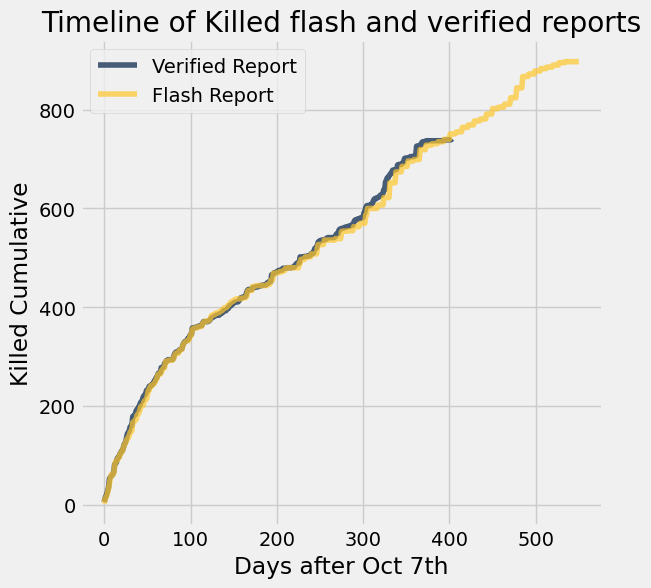

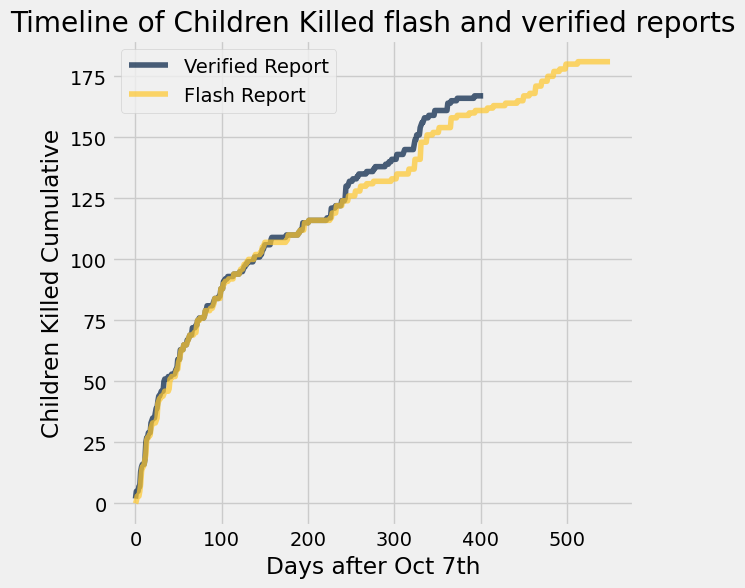

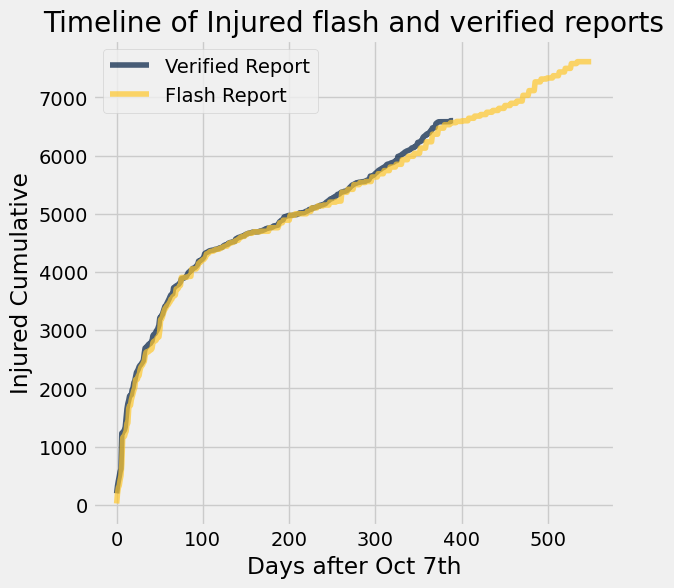

In [20]:
wb_timeline = westbank_casualties.with_column("Days after Oct 7th", np.arange(0, westbank_casualties.num_rows))
wb_timeline_killed_cum = wb_timeline.select("verified.killed_cum", "killed_cum",  "Days after Oct 7th")
wb_timeline_killed_child_cum = wb_timeline.select("verified.killed_children_cum", "killed_children_cum",  "Days after Oct 7th")
wb_timeline_injured_cum = wb_timeline.select("verified.injured_cum", "injured_cum",  "Days after Oct 7th")\

wb_timeline_killed_cum.plot("Days after Oct 7th")
plt.legend(["Verified Report", "Flash Report"])
plt.title("Timeline of Killed flash and verified reports")
plt.ylabel("Killed Cumulative")

wb_timeline_killed_child_cum.plot("Days after Oct 7th")
plt.legend(["Verified Report", "Flash Report"])
plt.title("Timeline of Children Killed flash and verified reports")
plt.ylabel("Children Killed Cumulative")

wb_timeline_injured_cum.plot("Days after Oct 7th")
plt.legend(["Verified Report", "Flash Report"])
plt.title("Timeline of Injured flash and verified reports")
plt.ylabel("Injured Cumulative")

plt.show()

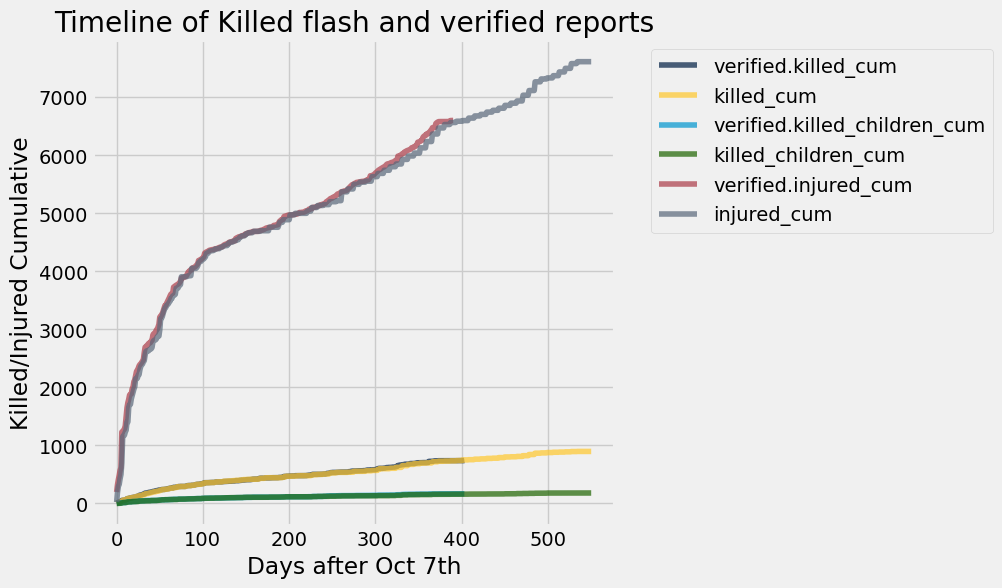

In [397]:
# Overlaid graph
# wb_timeline_overlaid = wb_timeline.select("verified.killed_cum", "killed_cum", "verified.killed_children_cum", "killed_children_cum", "verified.injured_cum", "injured_cum", "Days after Oct 7th")
# wb_timeline_overlaid.plot("Days after Oct 7th")
# plt.title("Timeline of Killed flash and verified reports")
# plt.ylabel("Killed/Injured Cumulative")
# plt.show()

In [19]:
def last_row(table):
    return table.take(table.num_rows-1).row(0).item(0)

In [21]:
# Last verified report for killed individuals
no_nan_westbank_casualties = westbank_casualties.where(~np.isnan(westbank_casualties.column("verified.killed_cum")))
last_row(no_nan_westbank_casualties)

'2024-11-13'

In [23]:
# Last flash update report for killed individuals
last_row(westbank_casualties)

'2025-04-09'

### Insights gained from the two line graphs
* The verified line (blue line) and flash reports line (red line) are overlapping most of the time throughout the graph. This shows high reliability of flash reports, even before verification. With the flash report line being able to closely track with the verification line allows policy-makers, analysts, or journalist to reasonably and confidently rely on flash reports data without final verification from the UN and perform the necessasry humanitarian aid or political response to the West Bank immediately. Furthermore, having these two lines graph being close to each other shows that there are little bias or exaggeration from the flash reports clearly presenting the evidence of the violence and injustice the Israel army are committing.

* We can't really tell how fast the verification process is. However, it seems like from the graph, the last verification from the UN and the latest flash report are far apart. The last verification was reported on **2024-11-13** meaning that the verified reports are lagging almost 5 months behind with the latest flash update reported at **2025-04-09**. Because we do not have data in regards to the delay of the verification report with respect to the flash report. We can assume three scenarios:
   1. That this is indeed a slow and thorough verification process probably to ensure accurate verified data are given out before being publicized.
   2. Due to increasing violence by Israel, the UN field staff are restricted to enter certain refugee camps and towns that are in conflict zones **OR** as violence continues which results in a chaotic and hectic environment, the field staff may feel overwhelmed and some may get caught in the crossfire reducing the number of staff to create reports.
   3. A ceasfire or the situation has de-escalated around the 400th day mark resulting in less reports from the UN being published.

In [26]:
def daily_stats_from_cumulative(table, col_label):
    return np.append(table.column(col_label).item(0), np.diff(table.column(col_label)))

In [953]:
# Daily Number of killed persons
wb_diff_killed_cum = daily_stats_from_cumulative(westbank_casualties, "killed_cum")

# Daily Number of killed children
wb_diff_killed_child_cum = daily_stats_from_cumulative(westbank_casualties, "killed_children_cum")

# Daily Number of injured persons
wb_diff_injured_cum =  daily_stats_from_cumulative(westbank_casualties, "injured_cum")

In [955]:
# Lets try to display the error on a histogram to visualize the error distrbution in each report
wb_error_killed =  wb_diff_killed_cum - westbank_casualties.column("verified.killed")
wb_error_child = wb_diff_killed_child_cum - westbank_casualties.column("verified.killed_children")
wb_error_injured = wb_diff_injured_cum - westbank_casualties.column("verified.injured")

wb_error_killed, wb_error_child, wb_error_injured

(array([ -3.,   2.,  -2.,  -1.,   1.,   0.,  -7.,   8.,   5.,  -2.,  -3.,
         -1.,   0.,   7.,  -2.,  -5.,   2.,  -1.,   1.,  -1.,   1.,   0.,
          1.,  -1.,  -1.,   1.,  -5.,  -4.,   0.,   0.,  -1.,   1.,  -1.,
         -1.,   0.,  -1.,   2.,  -7.,   7.,   1.,  -3.,   3.,   1.,   0.,
         -1.,  -7.,   5.,   0.,   0.,  -5.,   6.,   9.,  -6.,   6.,   1.,
          0.,  -1.,   0.,  -3.,   2.,  -1.,   2.,   1.,  -1.,   0.,   0.,
         -5.,   0.,   5.,   1.,  -8.,  11.,  -3.,   0.,  -2.,   2.,   0.,
          0.,   0.,   0.,   0.,  -2.,   0.,   1.,  -1.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  -3.,   0.,
          1.,   2.,   0.,  -2.,   2.,   0.,   0.,   0.,  -1.,   1.,   0.,
          0.,  -1.,   0.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   4.,   0.,   0.,  -1.,  -1.,   2.,  -1.,   1.,
          0.,   0.,   0.,   1.,  -1.,   0.,  -1.,   2.,   0.,   0.,  -2.,
          1.,   1.,  -3.,   3.,   0., 

In [983]:
# Remove nan values
wb_error_killed = wb_error_killed[~np.isnan(wb_error_killed)]
wb_error_child = wb_error_child[~np.isnan(wb_error_child)] 
wb_error_injured = wb_error_injured[~np.isnan(wb_error_injured)]

In [985]:
# Normalized
wb_error_killed_norm =  wb_error_killed / np.max(wb_error_killed)
wb_error_child_norm = wb_error_child / np.max(wb_error_child)
wb_error_injured_norm = wb_error_injured / np.max(wb_error_injured)

In [987]:
wb_error_cat = make_array(*(["Total Killed"] * wb_error_killed.size))
wb_error_cat = np.append(wb_error_cat, make_array(*(["Child Killed"] * wb_error_child.size)))
wb_error_cat = np.append(wb_error_cat, make_array(*(["Injured"] * wb_error_injured.size)))

wb_error_stat_norm = make_array()
wb_error_stat_norm = np.append(wb_error_stat_norm, wb_error_killed_norm)
wb_error_stat_norm = np.append(wb_error_stat_norm, wb_error_child_norm)
wb_error_stat_norm = np.append(wb_error_stat_norm, wb_error_injured_norm)

wb_error_cat.size, wb_error_stat_norm.size

(1195, 1195)

In [989]:
wb_error_stat_norm.max(), wb_error_stat_norm.min()

(1.0, -0.94508009153318073)

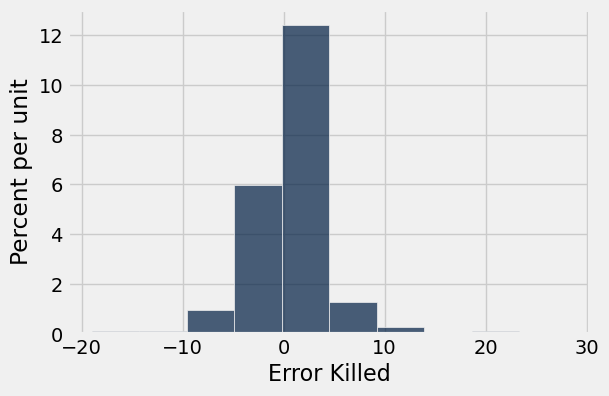

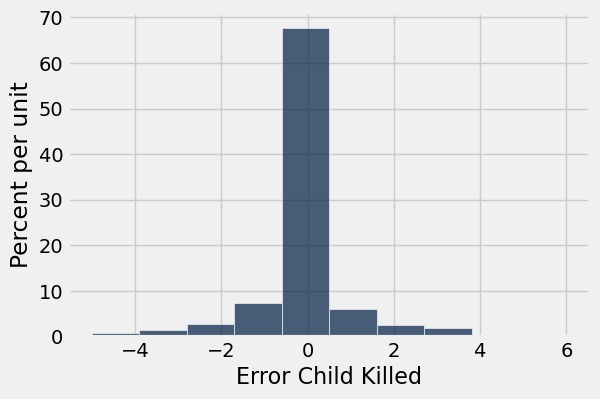

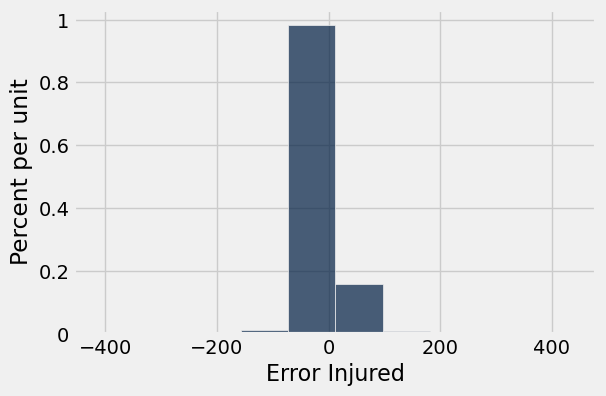

In [991]:
Table().with_column("Error Killed", wb_error_killed).hist()
Table().with_column("Error Child Killed", wb_error_child).hist()
Table().with_column("Error Injured", wb_error_injured).hist()
plt.show()

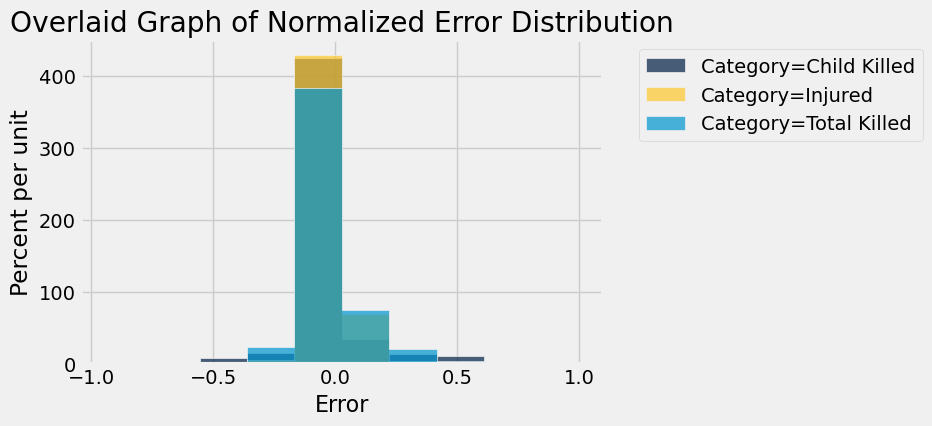

In [995]:
Table().with_columns(["Error", wb_error_stat_norm,
                   "Category", wb_error_cat]).hist(group="Category")
plt.title("Overlaid Graph of Normalized Error Distribution")
plt.show()

## Settler Attacks causes more Injuries/Killed in West Bank (Bar Chart)

In [782]:
wb_set_att = westbank_casualties.select("killed_cum","injured_cum", "settler_attacks_cum")
wb_set_att

killed_cum,injured_cum,settler_attacks_cum
3,23,3
13,194,9
15,295,19
19,332,29
26,427,39
33,500,49
43,700,63
54,1150,67
61,1173,70
61,1176,70


In [784]:
# Daily Number of settler attacks
wb_diff_settler_attacks_cum = daily_stats_from_cumulative(westbank_casualties, "settler_attacks_cum")

In [786]:
wb_set_att = wb_set_att.with_columns(["Daily Injured", wb_diff_injured_cum,
                         "Daily killed", wb_diff_killed_cum, 
                         "Daily Settler Attacks", wb_diff_settler_attacks_cum]).drop(0,1,2)
wb_set_att

Daily Injured,Daily killed,Daily Settler Attacks
23,3,3
171,10,6
101,2,10
37,4,10
95,7,10
73,7,10
200,10,14
450,11,4
23,7,3
3,0,0


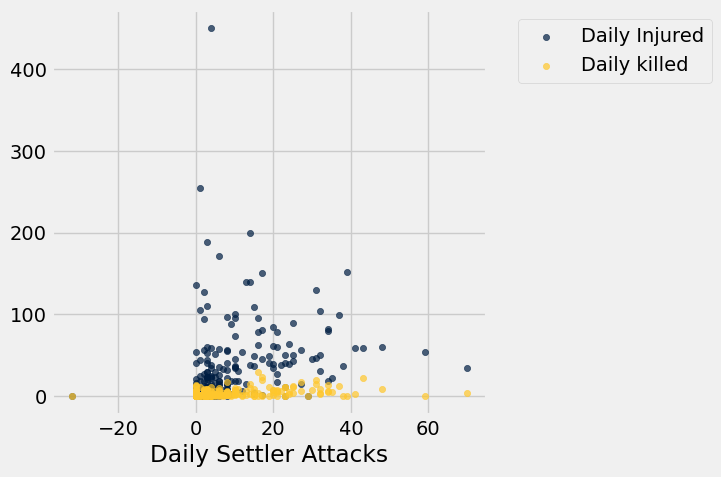

In [788]:
wb_set_att.scatter("Daily Settler Attacks")
plt.show()

In [790]:
# Negative diff in a cumulative data doesn't make sense (Need to be cleaned)
wb_set_att.where("Daily Settler Attacks", are.below(0))

Daily Injured,Daily killed,Daily Settler Attacks
0,0,-32


In [792]:
# Remove the row
wb_set_att = wb_set_att.where("Daily Settler Attacks", are.above_or_equal_to(0))

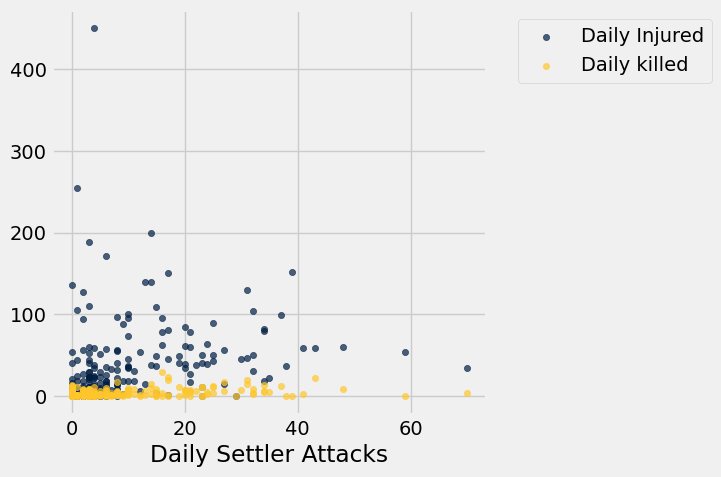

In [794]:
wb_set_att.scatter("Daily Settler Attacks")
plt.show()

In [796]:
# Lets delve more to see if we can see a much clearer difference between days without settler attacks and vice-versa
wb_set_att = wb_set_att.with_column("Is Settler Attack Day", wb_set_att.column("Daily Settler Attacks") != 0)
wb_set_att

Daily Injured,Daily killed,Daily Settler Attacks,Is Settler Attack Day
23,3,3,True
171,10,6,True
101,2,10,True
37,4,10,True
95,7,10,True
73,7,10,True
200,10,14,True
450,11,4,True
23,7,3,True
3,0,0,False


In [798]:
wb_set_att.drop(2).group("Is Settler Attack Day")

Is Settler Attack Day,count
False,373
True,177


In [800]:
wb_set_att_group = wb_set_att.drop(2).group("Is Settler Attack Day", sum).relabeled("Is Settler Attack Day", "Settler Attack Day")
wb_set_att_group

Settler Attack Day,Daily Injured sum,Daily killed sum
False,337,147
True,7276,750


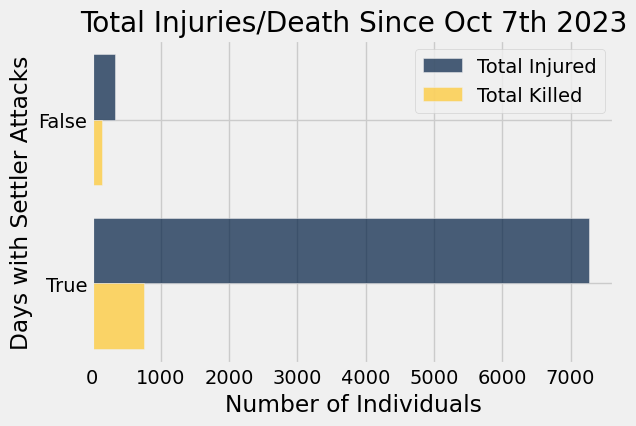

In [802]:
# A big difference can be seen from the table above lets visualize it into a bar chart to get a clearer view.
wb_set_att_group.barh("Settler Attack Day")
plt.title("Total Injuries/Death Since Oct 7th 2023")
plt.legend(["Total Injured", "Total Killed"])
plt.xlabel("Number of Individuals")
plt.ylabel("Days with Settler Attacks")
plt.show()

### Insights from the above bar chart
1. Most casualties occurred on days with Israeli settler attacks. Injuries on settler-attack days far exceed those on days without while Deaths are also significantly higher when settler violence is present. This implies that Settler attacks are not isolated events — they occur alongside or escalate broader violence involving killings and injuries.
2. Casualties still occur without settler attacks, but at a lower scale, even on days with no reported settler attacks, there are injuries and deaths. This shows the multi-dimensional nature of violence (e.g. military operations, clashes, raids).
3. The data shows a clear association between settler attacks and higher casualty counts. While violence also exists independently, settler-attack days coincide with disproportionate harm to Palestinians in the West Bank, highlighting a pattern worth monitoring for prevention and accountability.

### Histogram representing the distrbution of individuals killed based on gender. (May be used)

In [806]:
killed_in_gaza.column('Age').max()

110

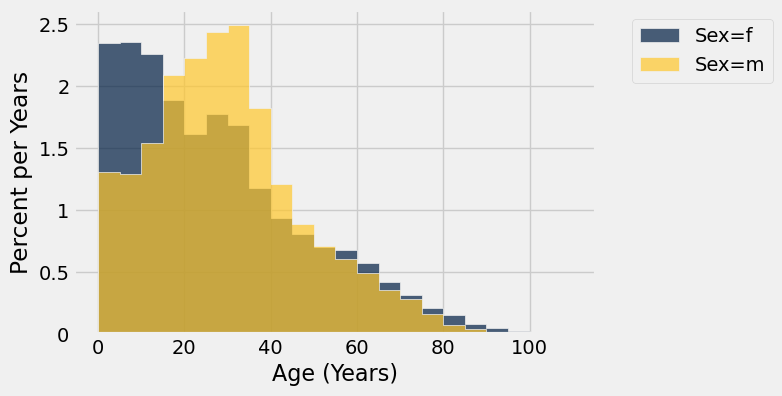

In [808]:
# Lets check the age and gender distribution of individuals killed in Gaza.
killed_in_gaza.hist("Age", bins=np.arange(0,115,5), group="Sex", unit="Years")
plt.show()

In [809]:
killed_in_gaza.group("Sex")

Sex,count
f,16504
m,33516


### Daily Death Rate during days where emergency services individuals are killed and vice-versa (Bar Chart)

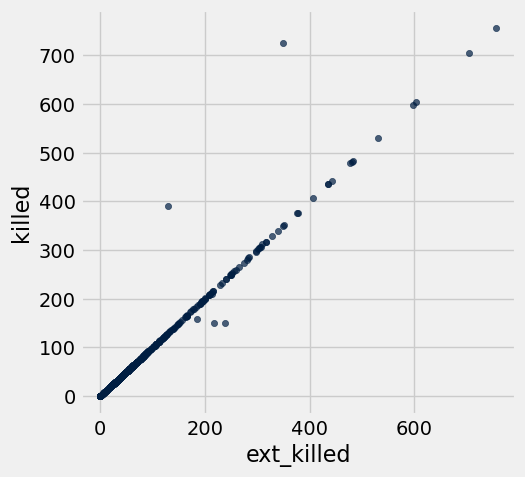

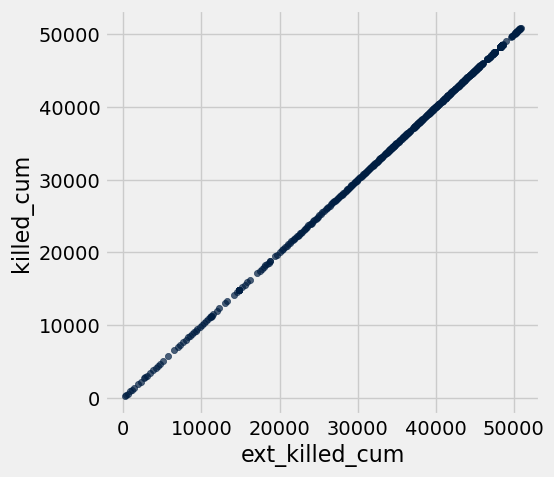

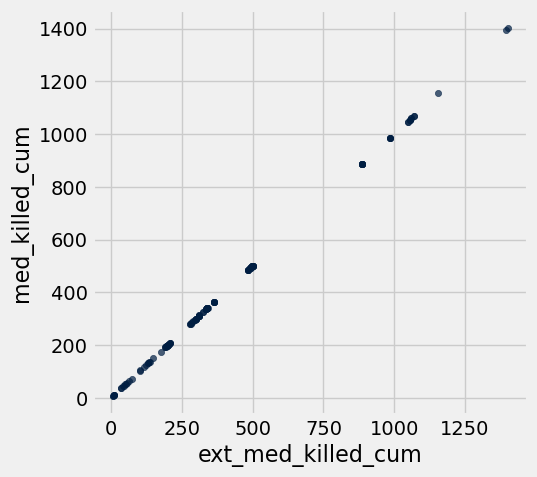

In [813]:
gaza_casualties.scatter("ext_killed", "killed")
gaza_casualties.scatter("ext_killed_cum", "killed_cum")
gaza_casualties.scatter("ext_med_killed_cum", "med_killed_cum")
plt.show()

'ext_killed' has some different values with 'killed'. Therefore, we will instead calculate daily death using 'ext_killed_cum' for better accuracy.

In [816]:
daily_death_civdef = daily_stats_from_cumulative(gaza_casualties, "ext_civdef_killed_cum")
daily_death_med = daily_stats_from_cumulative(gaza_casualties, "ext_med_killed_cum")

daily_death_civdef[:20], daily_death_med[:20]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([ 6,  0,  0,  0,  4,  1,  0,  0,  0, 26,  0,  0,  7,  2,  5,  3,  3,
         8,  8, 28]))

In [820]:
daily_death_services = daily_death_civdef + daily_death_med
daily_death_services[:20]

array([ 6,  0,  0,  0,  4,  1,  0,  0,  0, 33,  0,  0,  7,  2,  5,  3,  3,
        8,  8, 28])

In [822]:
daily_total_child_killed = daily_stats_from_cumulative(gaza_casualties, "ext_killed_children_cum")
daily_total_child_killed[:20]

array([  0,  78,  13, 169, 138, 102,   0, 100, 100, 153,  87,  60, 524,
       232,   0, 117, 182, 305, 344, 334])

In [824]:
daily_total_women_killed = daily_stats_from_cumulative(gaza_casualties, "ext_killed_women_cum")
daily_total_women_killed[:20]

array([  0,  41,  20, 169,   0,  46, 116, 208, 135, 201,   0,   0,   0,
         0,  31,  56,  96, 173, 292,  16])

In [840]:
#Excluding the medical, civil defense people, women, and children
daily_total_killed = daily_stats_from_cumulative(gaza_casualties, "ext_killed_cum") - daily_death_services - daily_total_child_killed - daily_total_women_killed
daily_total_killed[:20]

array([ 226,   19,  157,    2,   58,  168,  367,   20,  207, -249,  105,
        418, -224,  118,  212,   90,  155,  218,  112,  103])

In [842]:
gz_serv_peop_deaths = Table().with_columns(["Daily Killed", daily_total_killed,
                                            "Daily Children Killed", daily_total_child_killed,
                                            "Daily Women Killed", daily_total_women_killed,
                                            "Daily Med and Civ Def Killed", daily_death_services,
                                           ])
gz_serv_peop_deaths

Daily Killed,Daily Children Killed,Daily Women Killed,Daily Med and Civ Def Killed
226,0,0,6
19,78,41,0
157,13,20,0
2,169,169,0
58,138,0,4
168,102,46,1
367,0,116,0
20,100,208,0
207,100,135,0
-249,153,201,33


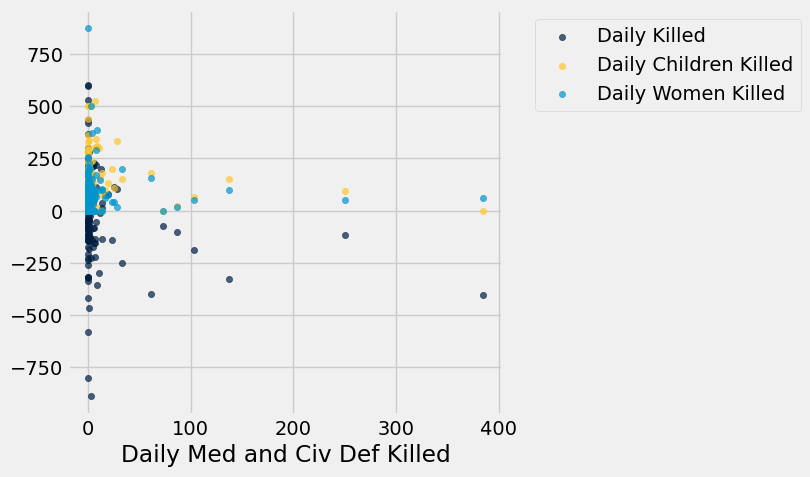

In [844]:
# Doesnt really show any relationship
gz_serv_peop_deaths.scatter("Daily Med and Civ Def Killed")
plt.show()

In [852]:
# Removing negative values
gz_serv_peop_deaths = gz_serv_peop_deaths.where("Daily Children Killed", are.above_or_equal_to(0)).where("Daily Killed", are.above_or_equal_to(0)).where("Daily Women Killed", are.above_or_equal_to(0)).where("Daily Med and Civ Def Killed", are.above_or_equal_to(0))
gz_serv_peop_deaths

Daily Killed,Daily Children Killed,Daily Women Killed,Daily Med and Civ Def Killed,Is Serivce Killed Days
226,0,0,6,False
19,78,41,0,True
157,13,20,0,True
2,169,169,0,True
58,138,0,4,False
168,102,46,1,True
367,0,116,0,True
20,100,208,0,True
207,100,135,0,True
105,87,0,0,False


In [854]:
is_service_killed_days = gz_serv_peop_deaths.column(3) != 0
gz_serv_peop_deaths = gz_serv_peop_deaths.with_column("Is Serivce Killed Days", is_service_killed_days)
gz_serv_peop_deaths

Daily Killed,Daily Children Killed,Daily Women Killed,Daily Med and Civ Def Killed,Is Serivce Killed Days
226,0,0,6,True
19,78,41,0,False
157,13,20,0,False
2,169,169,0,False
58,138,0,4,True
168,102,46,1,True
367,0,116,0,False
20,100,208,0,False
207,100,135,0,False
105,87,0,0,False


In [856]:
gz_serv_peop_deaths_sum = gz_serv_peop_deaths.group("Is Serivce Killed Days", np.sum)
gz_serv_peop_deaths_sum

Is Serivce Killed Days,Daily Killed sum,Daily Children Killed sum,Daily Women Killed sum,Daily Med and Civ Def Killed sum
False,28158,2076,1391,0
True,4107,4075,2558,234


In [858]:
gz_serv_peop_deaths_count = gz_serv_peop_deaths.group("Is Serivce Killed Days")
gz_serv_peop_deaths_count

Is Serivce Killed Days,count
False,433
True,40


In [868]:
# Lets get the rate of daily average death between the two categories
gz_serv_peop_deaths_avg = gz_serv_peop_deaths.group("Is Serivce Killed Days", np.average)
gz_serv_peop_deaths_avg = gz_serv_peop_deaths_avg.relabeled("Daily Killed average", "Non-Child-Women Death Rate").relabeled("Daily Children Killed average", "Children Death Rate").relabeled("Daily Women Killed average", "Women Death Rate").drop(4)
gz_serv_peop_deaths_avg

Is Serivce Killed Days,Non-Child-Women Death Rate,Children Death Rate,Women Death Rate
False,65.03,4.79446,3.21247
True,102.675,101.875,63.95


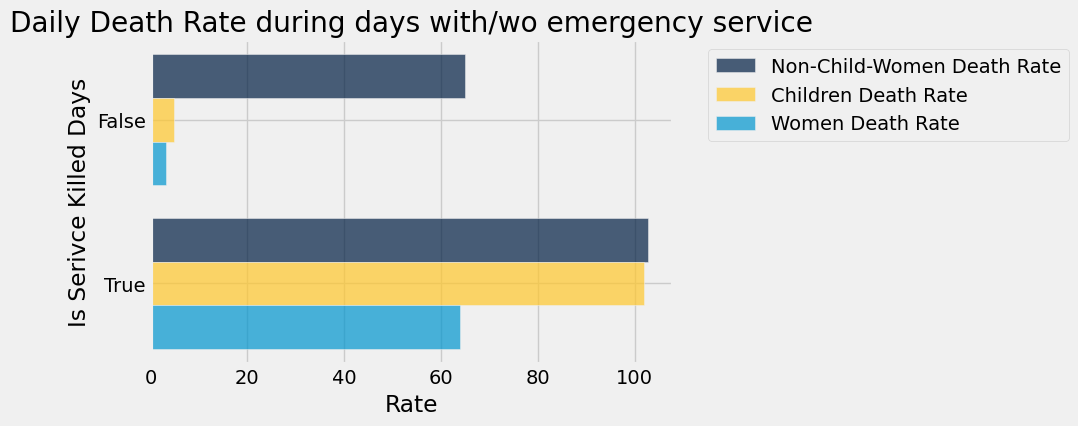

In [870]:
gz_serv_peop_deaths_avg.barh("Is Serivce Killed Days")
plt.title("Daily Death Rate during days with/wo emergency service")
plt.xlabel("Rate")
plt.show()

### Insights from the above bar chart
1. Although day-to-day variability is high (as seen in the scatter plot), the group averages indicate that days when emergency service personnel are killed are associated with a significantly higher number of civilian deaths.
   
3. Non-child death rate is significantly higher on 'Service Killed Days' from 70 to nearly 150/day. Overall, the total death rate essentially doubles when medics or civil defense teams are killed.

4. Child death rates are 10 times higher on days when emergency services are attacked. During "Service Killed Days", child deaths spike to over 100 per day while on non-service-killed days, child death rate is barely above 10. This shows that when medical/rescue services are attacked, children are disproportionately affected. This could be because children are not able to react when such a situation happens and that they are much weaker in general. Therefore, any denied or delayed emergency care can greatly affect the number of children death. Other highly potential reasons are the collapse of evacuation/rescue infrastructure from Israel's attacks preventing guiding children from escaping the conflict area.

5. It can be said that the presence of emergency response directly affects survivability, especially to children. Attacking those teams increases overall lethality of conflict events. Therefore, this strong association create greater awareness of the importance in personnel aid and when their number decrease after an attack, humanitarian aid and political people should rush and provide the necessary relief efforts and reinforce emergency services in such moments of crisis.

## 3. Hypothesis Testing

### Hypothesis Testing

#### 3.1 Does the day when emergency and medical services' indivudals are killed result in higher civilian deaths?

**Null Hypothesis**: In the population, the distributions of deaths on days with/wo emergency services's deaths are the same. (They are different in the sample just due to chance.)

**Alternative Hypothesis**:In the population, on days with emergency services dead have **higher** death numbers, on average, than on days without any emergency services individuals dead.

Keys: _E = Emergency_, _M = Medical_

**Test Statistic Used**: Average Deaths on E/M Service Killed Days − Average Deaths on E/M Service Killed Days

**Reason**: This shows whether there is an effect or not on the number of deaths between days when E/M services are killed and vice-versa

**Meaning**: 
1. Small Values (Close to Zero) = No real effect
2. Negative Values = On average, Less number of civilians are killed on days when E/M services are killed
3. Large Positive Values = On average, more number of civilians are killed on days when E/M services are killed

**Significance Level**: We will conduct the hypothesis test at a significance level of **1%**

In [872]:
gz_serv_peop_deaths

Daily Killed,Daily Children Killed,Daily Women Killed,Daily Med and Civ Def Killed,Is Serivce Killed Days
226,0,0,6,True
19,78,41,0,False
157,13,20,0,False
2,169,169,0,False
58,138,0,4,True
168,102,46,1,True
367,0,116,0,False
20,100,208,0,False
207,100,135,0,False
105,87,0,0,False


In [874]:
civilian_deaths = gz_serv_peop_deaths.column("Daily Killed") + gz_serv_peop_deaths.column("Daily Children Killed") + gz_serv_peop_deaths.column("Daily Women Killed")
gz_civilian_deaths = gz_serv_peop_deaths.drop(0,1,2,3).with_column("Total Civlians Killed", civilian_deaths)
gz_civilian_deaths

Is Serivce Killed Days,Total Civlians Killed
True,226
False,138
False,190
False,340
True,196
True,316
False,483
False,328
False,442
False,192


In [876]:
gz_civilian_death_avg = gz_civilian_deaths.group("Is Serivce Killed Days", np.average)
gz_civilian_death_avg

Is Serivce Killed Days,Total Civlians Killed average
False,73.037
True,268.5


In [878]:
observed_statistic = gz_civilian_death_avg.column(1).item(1) - gz_civilian_death_avg.column(1).item(0)
observed_statistic

195.46304849884527

In [880]:
def difference_of_means(table, numeric_label, category_label):
    """
    Takes: 
       - name of table
       - column label of numerical variable
       - column label of categorical variable
       
    Returns: Difference of means of the two groups
    """
    
    #table with the two relevant columns
    reduced = table.select(numeric_label, category_label)  
    
    # table containing group means
    means_table = reduced.group(category_label, np.average)
    
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [882]:
difference_of_means(gz_civilian_deaths, "Total Civlians Killed", "Is Serivce Killed Days")

195.46304849884527

In [884]:
gz_civilian_deaths

Is Serivce Killed Days,Total Civlians Killed
True,226
False,138
False,190
False,340
True,196
True,316
False,483
False,328
False,442
False,192


#### Simulatation Steps
1. Simulate by randomly shuffling the "Is Service Killed Days" labels among all days.
2. Every shuffle calculate the simulated test statistic.
3. Append he statistic to an array of test statistics.
4. Repeat 10000 times to form an empirical distribution of the test statistic under the null hypothesis.

In [887]:
def one_simulated_difference(table, numeric_label, category_label):
    """
    Takes: 
       - name of table
       - column label of numerical variable
       - column label of categorical variable
       
    Returns: Difference of means of the two groups
    """
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(category_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(numeric_label).with_column('Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, numeric_label, 'Shuffled Label')   

In [889]:
avg_differences = make_array()

for i in np.arange(10000):
    new_avg_difference = one_simulated_difference(gz_civilian_deaths, 'Total Civlians Killed', 'Is Serivce Killed Days')
    avg_differences = np.append(avg_differences, new_avg_difference)

Observed Statistic: 195.46304849884527


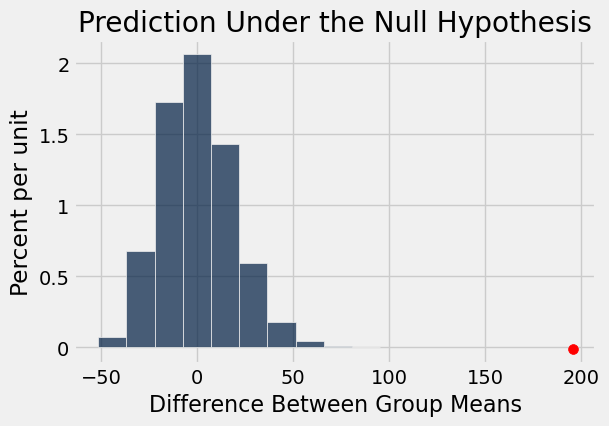

In [890]:
Table().with_column('Difference Between Group Means', avg_differences).hist()
print('Observed Statistic:', observed_statistic)
plt.title('Prediction Under the Null Hypothesis');
plt.scatter(observed_statistic, -.0001, color='red', s=50);
plt.show()

#### Simulation Results
1. We will calculate the p-value
2. If p-value < 0.01, we will reject the null hypothesis and conclude that death of E/M Services significantly increases number of civilian deaths.

In [892]:
# It can already be clearly seen that it rejects the null hypothesis but we will still compute the p-value to be sure.👍
pvalue = np.sum(avg_differences > observed_statistic)/len(avg_differences)
pvalue

0.0

**Conclusion**: Since the p-value is less than 0.01, we reject the null hypothesis. We conclude that the deaths of emergency and medical services personnel are significantly associated with an increase in the number of civilian deaths and is not just due to random chance.